# Credit Risk Prediction - Classification ML Project

This project is based on The German Credit Risk dataset. The goal is to predict if this loan credit would be a risk to the bank or not? In simple terms, if the loan amount is given to the applicant, will they pay back or become a defaulter?

The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

### Reading the data into python

In [58]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Reading the dataset
import pandas as pd
import numpy as np
creditRiskData=pd.read_csv('C:/Users/Lenovo/Desktop/Projects/Credit Risk Prediction/Datasets/creditRiskData.csv', encoding='latin')
creditRiskData.head()

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [60]:
print('Shape before deleting duplicate values:', creditRiskData.shape)

# removing duplicate rows from the data
creditRiskData=creditRiskData.drop_duplicates()
print('Shape after deleting duplicate values:', creditRiskData.shape)

Shape before deleting duplicate values: (1000, 21)
Shape after deleting duplicate values: (1000, 21)


## Data description
The business meaning of each column in the data is as below

* GoodCredit: Whether the issued loan was a good decision or bad
* checkingstatus: Status of existing checking account.
* duration: Duration of loan in months
* history: Credit history of the applicant
* purpose: Purpose for the loan
* amount: Credit amount
* savings: Savings account/bonds
* employ: Present employment since
* installment: Installment rate in percentage of disposable income
* status: Personal status and sex
* others: Other debtors / guarantors for the applicant
* residence: Present residence since
* property: Property type of applicant
* age: Age in years
* otherplans: Other installment plans
* housing: Housing
* cards: Number of existing credits at this bank
* job: Job
* liable: Number of people being liable to provide maintenance for
* tele: Is the Telephone registered or not
* foreign: Is the applicant a foreign worker

## Defining the problem statement: 
#### Create a Predictive model which can tell weather to approve a loan application or not?
* Target Variable: GoodCredit
* Predictors: duration2, history3, amount5, purpose4,installment8 etc.
* GoodCredit=1 means the loan was a good decision.
* GoodCredit=0 means the loan was a bad decision.

### Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

## Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='GoodCredit'>

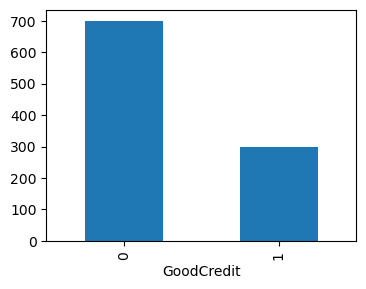

In [61]:
# Creating Bar chart as the Target variable is Categorical
%matplotlib inline
groupedData=creditRiskData.groupby('GoodCredit').size()
groupedData.plot(kind='bar', figsize=(4,3))

* The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

## Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [62]:
# Looking at sample rows in the data
creditRiskData.head()

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [63]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
creditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GoodCredit       1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration2        1000 non-null   int64 
 3   history3         1000 non-null   object
 4   purpose4         1000 non-null   object
 5   amount5          1000 non-null   int64 
 6   savings6         1000 non-null   object
 7   employ7          1000 non-null   object
 8   installment8     1000 non-null   int64 
 9   status9          1000 non-null   object
 10  others10         1000 non-null   object
 11  residence11      1000 non-null   int64 
 12  property12       1000 non-null   object
 13  age13            1000 non-null   int64 
 14  otherplans14     1000 non-null   object
 15  housing15        1000 non-null   object
 16  cards16          1000 non-null   int64 
 17  job17            1000 non-null   o

In [64]:
# Looking at the descriptive statistics of the data
creditRiskData.describe(include='all')

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [65]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
creditRiskData.nunique()

GoodCredit           2
checkingstatus1      4
duration2           33
history3             5
purpose4            10
amount5            921
savings6             5
employ7              5
installment8         4
status9              4
others10             3
residence11          4
property12           4
age13               53
otherplans14         3
housing15            3
cards16              4
job17                4
liable18             2
tele19               2
foreign20            2
dtype: int64

## Basic Data Exploration Results
Based on the basic exploration conducted above, a simple report of the data can now be created, noting down observations regarding each column. This will help in creating an initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>GoodCredit</b>: Categorical. Selected. This is the <b>Target Variable!</b>     
* <b>checkingstatus1</b>: Categorical. Selected.
* <b>duration2</b>: Continuous. Selected.     
* <b>history3</b>: Categorical. Selected.      
* <b>purpose4</b>: Categorical. Selected.      
* <b>amount5</b>: Continuous. Selected.       
* <b>savings6</b>: Categorical. Selected.      
* <b>employ7</b>:  Categorical. Selected.      
* <b>installment8</b>: Categorical. Selected.  
* <b>status9</b>: Categorical. Selected.       
* <b>others10</b>: Categorical. Selected.      
* <b>residence11</b>: Categorical. Selected.   
* <b>property12</b>: Categorical. Selected.    
* <b>age13</b>: Continuous. Selected.         
* <b>otherplans14</b>: Categorical. Selected.  
* <b>housing15</b>: Categorical. Selected.     
* <b>cards16</b>: Categorical. Selected.       
* <b>job17</b>: Categorical. Selected.         
* <b>liable18</b>: Categorical. Selected.      
* <b>tele19</b>: Categorical. Selected.        
* <b>foreign20</b>:  Categorical. Selected.    

## Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted 17 categorical predictors in the data

Categorical Predictors: 
'checkingstatus1', 'history3', 'purpose4', 'savings6', 'employ7', 'installment8', 'status9', 'others10',
'residence11', 'property12', 'otherplans14', 'housing15', 'cards16', 'job17', 'liable18', 'tele19', 'foreign20'

We use bar charts to see how the data is distributed for these categorical columns.

In [66]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colmsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colmsToPlot), figsize=(25,5))
    fig.suptitle('Bar charts of: '+ str(colmsToPlot))
    
    for colms, plotNumber in zip(colmsToPlot, range(len(colmsToPlot))):
        inpData.groupby(colms).size().plot(kind='bar', ax=subPlot[plotNumber])

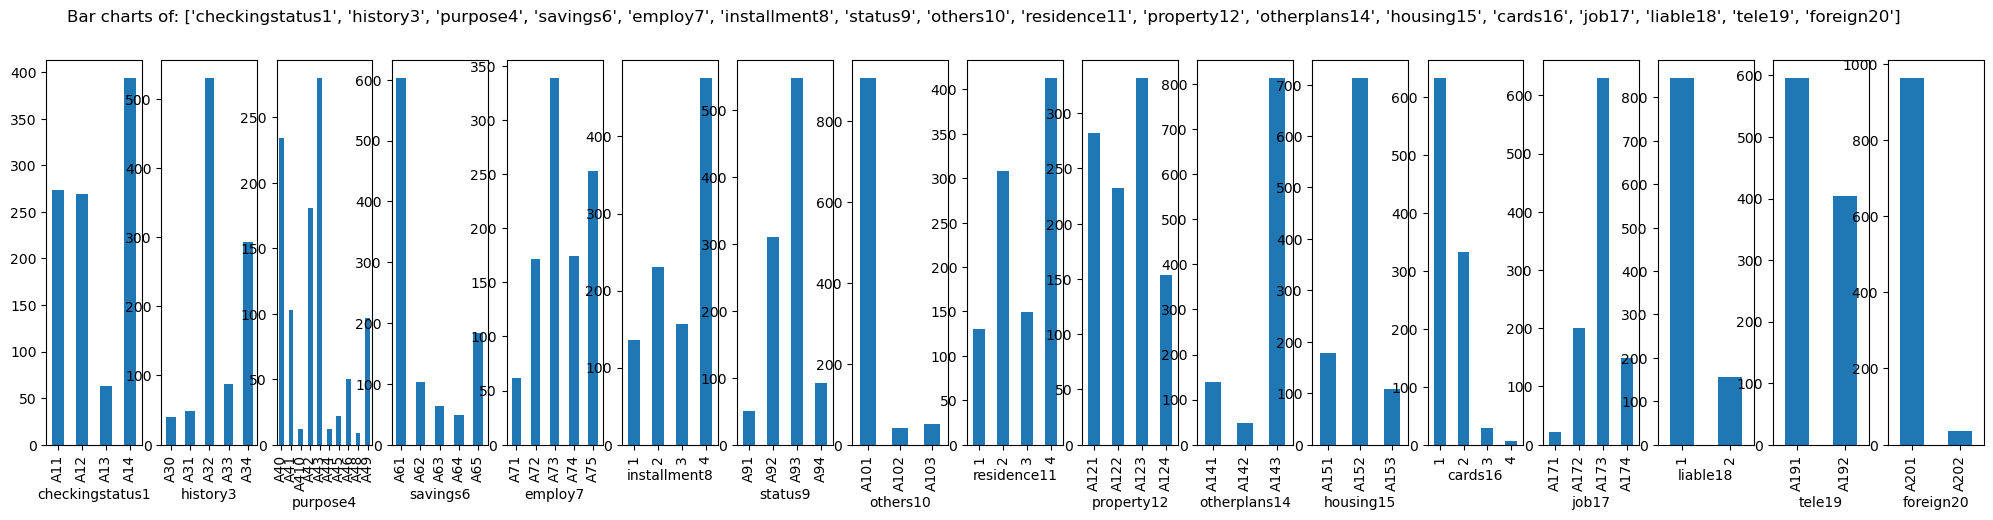

In [67]:
# Calling the function
PlotBarCharts(inpData=creditRiskData, colmsToPlot=['checkingstatus1', 'history3', 'purpose4', 'savings6', 'employ7', 'installment8', 'status9', 'others10',
'residence11', 'property12', 'otherplans14', 'housing15', 'cards16', 'job17', 'liable18', 'tele19', 'foreign20'])

### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

## Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'duration2', 'amount5' and 'age13'

array([[<Axes: title={'center': 'duration2'}>,
        <Axes: title={'center': 'amount5'}>],
       [<Axes: title={'center': 'age13'}>, <Axes: >]], dtype=object)

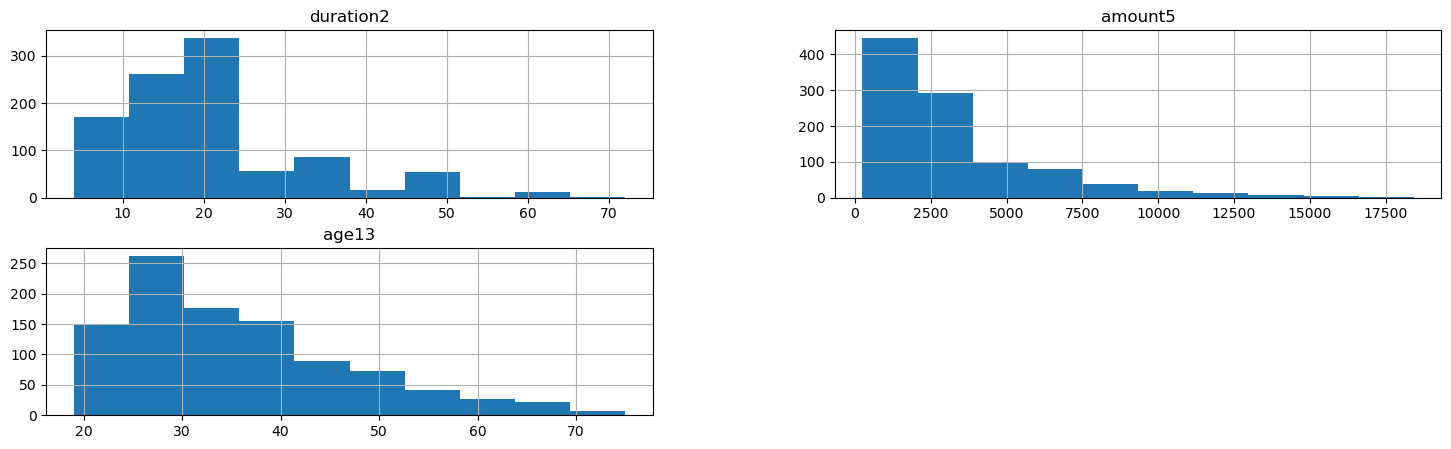

In [68]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
creditRiskData.hist(['duration2', 'amount5', 'age13'], figsize=(18,5))

### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. 
The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>duration2</b> : Selected. Slightly skewed distribution, acceptable.
* <b>amount5</b>: Selected. Slightly skewed distribution, acceptable.
* <b>age13</b>: Selected. Slightly skewed distribution, acceptable

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. One can see them as the tails in the histogram.
Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.
There are below two options to treat outliers in the data. 
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

In this data all the continuous variables have slightly skewed distribution, which is acceptable, hence no outlier treatment is required.

## Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [69]:
# Finding how many missing values are there for each column
creditRiskData.isnull().sum()

GoodCredit         0
checkingstatus1    0
duration2          0
history3           0
purpose4           0
amount5            0
savings6           0
employ7            0
installment8       0
status9            0
others10           0
residence11        0
property12         0
age13              0
otherplans14       0
housing15          0
cards16            0
job17              0
liable18           0
tele19             0
foreign20          0
dtype: int64

* There is no outlier in this data

## Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

## Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using Boxplots and measure the strength of relation using Anova test

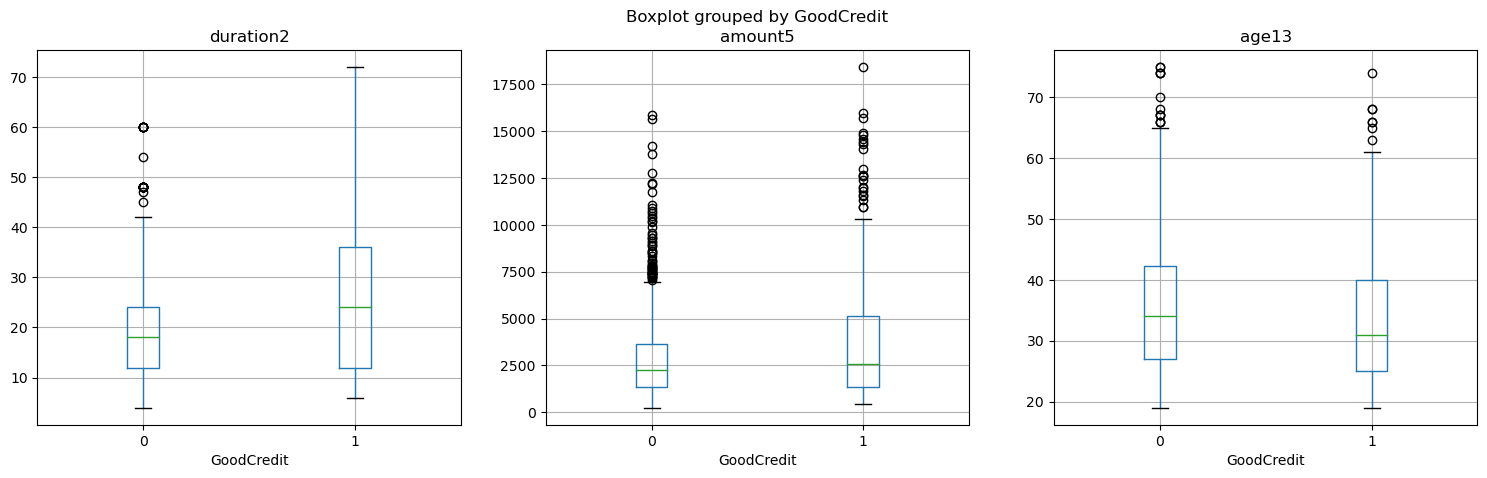

In [70]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColms=['duration2', 'amount5', 'age13']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColms), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorColms, i in zip(ContinuousColms, range(len(ContinuousColms))):
    creditRiskData.boxplot(column=PredictorColms, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Box-Plots interpretation
### What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "age" Vs "GoodCredit". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, one cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.

The other other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [71]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionANOVA(inpData, TargetVariable, ContinuousPreddictors):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictors in ContinuousPreddictors:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictors].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictors, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictors)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [72]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['duration2', 'amount5', 'age13']
FunctionANOVA(inpData=creditRiskData, TargetVariable='GoodCredit', ContinuousPreddictors=ContinuousVariables)

##### ANOVA Results ##### 

duration2 is correlated with GoodCredit | P-Value: 6.488049877187189e-12
amount5 is correlated with GoodCredit | P-Value: 8.797572373533373e-07
age13 is correlated with GoodCredit | P-Value: 0.003925339398278295


['duration2', 'amount5', 'age13']

The results of ANOVA confirm the visual analysis using box plots above.

<b>Final selected Continuous columns:</b>

'duration2', 'amount5', 'age13'

The results of ANOVA confirm our visual analysis using box plots above!

Notice the P-Value of "age", it is just at the boundry of the threshold. This is something that had already been suspected in the box plots section.

While the other two P-Values are clearly zero, hence they are correlated without doubt.

All three columns are correlated with GoodCredit.

## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [73]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=creditRiskData['employ7'], columns=creditRiskData['GoodCredit'])
CrossTabResult

GoodCredit,0,1
employ7,,
A71,39,23
A72,102,70
A73,235,104
A74,135,39
A75,189,64


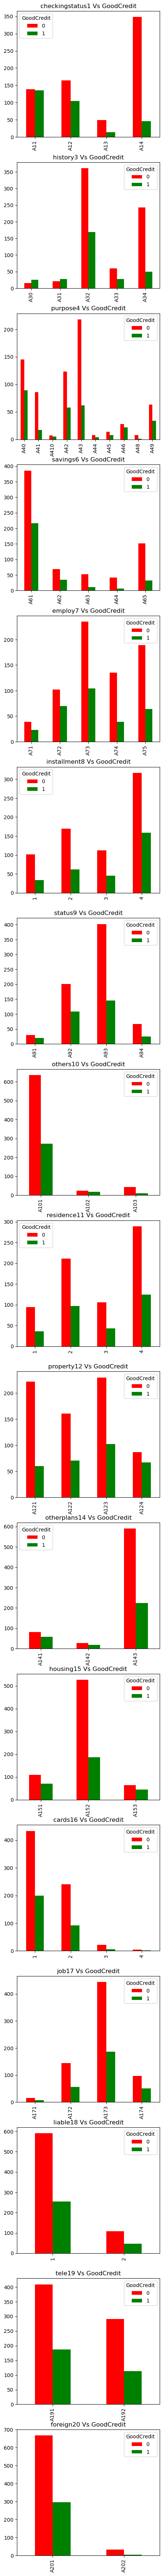

In [74]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus1', 'history3', 'purpose4', 'savings6', 'employ7', 'installment8', 'status9', 'others10',
'residence11', 'property12', 'otherplans14', 'housing15', 'cards16', 'job17', 'liable18', 'tele19', 'foreign20']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(5,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for cols, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=creditRiskData[cols], columns=creditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=cols+' Vs '+'GoodCredit')
    PlotCanvas[i].set_xlabel('')  # Remove x-axis label

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated.

For example, look at the "tele" Vs "GoodCredit" plot. The 0 vs 1 ratio for A191 is similar to A192, it means tele does not affect the Good/Bad Credit!. Hence, these two variables are not correlated.

On the other hand, look at the "history" vs "GoodCredit" plot. The number of Bad Credits are very high if history=A32 and A34. It means history affects the Good/Bad Credit! Hence, two columns are correlated with each other.

This analysis is confirmed in the section below using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [75]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=creditRiskData['GoodCredit'], columns=creditRiskData['employ7'])
CrossTabResult

employ7,A71,A72,A73,A74,A75
GoodCredit,,,,,
0,39,102,235,135,189
1,23,70,104,39,64


In [76]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariables):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for predictors in CategoricalVariables:
        crossTabResult=pd.crosstab(index=creditRiskData['GoodCredit'], columns=creditRiskData[predictors])
        ChiSqrResult=chi2_contingency(crossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqrResult[1] < 0.05):
            print(predictors, 'is correlated with', TargetVariable, '| P-Value:', ChiSqrResult[1])
            SelectedPredictors.append(predictors)
        else:
            print(predictors, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqrResult[1])
            
    return(SelectedPredictors)

In [77]:
CategoricalColsList=['checkingstatus1', 'history3', 'purpose4', 'savings6', 'employ7', 'installment8', 'status9', 'others10',
'residence11', 'property12', 'otherplans14', 'housing15', 'cards16', 'job17', 'liable18', 'tele19', 'foreign20']

# Calling function
FunctionChisq(inpData=creditRiskData , TargetVariable='GoodCredit' , CategoricalVariables= CategoricalColsList)

checkingstatus1 is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history3 is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose4 is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings6 is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ7 is correlated with GoodCredit | P-Value: 0.001045452349140254
installment8 is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status9 is correlated with GoodCredit | P-Value: 0.02223800546926877
others10 is correlated with GoodCredit | P-Value: 0.036055954027247226
residence11 is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property12 is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans14 is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing15 is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards16 is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job17 is NOT correlated with GoodCredit |

['checkingstatus1',
 'history3',
 'purpose4',
 'savings6',
 'employ7',
 'status9',
 'others10',
 'property12',
 'otherplans14',
 'housing15',
 'foreign20']

<b>Finally selected Categorical variables:</b>

'checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','property12','otherplans14','housing15','foreign20'

## Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [78]:
SelectedColumns=['duration2', 'amount5', 'age13', 'checkingstatus1','history3','purpose4','savings6',
                 'employ7','status9','others10','property12','otherplans14','housing15','foreign20']

# Selecting final columns
DataForML=creditRiskData[SelectedColumns]
DataForML.head()

,duration2,amount5,age13,checkingstatus1,history3,purpose4,savings6,employ7,status9,others10,property12,otherplans14,housing15,foreign20
0,6,1169,67,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201
1,48,5951,22,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201
2,12,2096,49,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201
3,42,7882,45,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201
4,24,4870,53,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201


In [79]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### Converting Ordinal variables to numeric using business mapping
"employ" column has ordinal properties.

In [80]:
# Treating the Ordinal variable first
DataForML['employ7'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

#### Converting the binary nominal variable to numeric using 1/0 mapping

In [81]:
# Treating the binary nominal variable
DataForML['foreign20'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,duration2,amount5,age13,checkingstatus1,history3,purpose4,savings6,employ7,status9,others10,property12,otherplans14,housing15,foreign20
0,6,1169,67,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1
1,48,5951,22,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1
2,12,2096,49,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1
3,42,7882,45,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1
4,24,4870,53,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1


### Converting the nominal variable to numeric using get_dummies()

In [82]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['GoodCredit']=creditRiskData['GoodCredit']

# Printing sample rows
DataForML_Numeric.head()

,duration2,amount5,age13,employ7,foreign20,checkingstatus1_A11,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,history3_A30,...,property12_A122,property12_A123,property12_A124,otherplans14_A141,otherplans14_A142,otherplans14_A143,housing15_A151,housing15_A152,housing15_A153,GoodCredit
0,6,1169,67,5,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,48,5951,22,3,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,12,2096,49,4,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,42,7882,45,4,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,24,4870,53,3,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


## Machine Learning: Splitting the data into Training and Testing sample
The full data set is not used for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [83]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['duration2', 'amount5', 'age13', 'employ7', 'foreign20',
       'checkingstatus1_A11', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history3_A30', 'history3_A31', 'history3_A32',
       'history3_A33', 'history3_A34', 'purpose4_A40', 'purpose4_A41',
       'purpose4_A410', 'purpose4_A42', 'purpose4_A43', 'purpose4_A44',
       'purpose4_A45', 'purpose4_A46', 'purpose4_A48', 'purpose4_A49',
       'savings6_A61', 'savings6_A62', 'savings6_A63', 'savings6_A64',
       'savings6_A65', 'status9_A91', 'status9_A92', 'status9_A93',
       'status9_A94', 'others10_A101', 'others10_A102', 'others10_A103',
       'property12_A121', 'property12_A122', 'property12_A123',
       'property12_A124', 'otherplans14_A141', 'otherplans14_A142',
       'otherplans14_A143', 'housing15_A151', 'housing15_A152',
       'housing15_A153', 'GoodCredit'],
      dtype='object')

In [84]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['duration2', 'amount5', 'age13', 'employ7', 'foreign20',
       'checkingstatus1_A11', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history3_A30', 'history3_A31', 'history3_A32',
       'history3_A33', 'history3_A34', 'purpose4_A40', 'purpose4_A41',
       'purpose4_A410', 'purpose4_A42', 'purpose4_A43', 'purpose4_A44',
       'purpose4_A45', 'purpose4_A46', 'purpose4_A48', 'purpose4_A49',
       'savings6_A61', 'savings6_A62', 'savings6_A63', 'savings6_A64',
       'savings6_A65', 'status9_A91', 'status9_A92', 'status9_A93',
       'status9_A94', 'others10_A101', 'others10_A102', 'others10_A103',
       'property12_A121', 'property12_A122', 'property12_A123',
       'property12_A124', 'otherplans14_A141', 'otherplans14_A142',
       'otherplans14_A143', 'housing15_A151', 'housing15_A152',
       'housing15_A153']

X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=20)

## Standardization/Normalization of data
This step can be skipped if the goal is to compare the resultant accuracy of this transformation with the accuracy of the raw data. However, it becomes necessary if using KNN or Neural Networks.

In [85]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [86]:
# Sanity check for the sampled data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


# Logistic Regression

In [87]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf=LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train, Y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)

# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData[TargetVariable]=Y_test
TestingData['Predicted'+TargetVariable]=prediction
print(TestingData.head())

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(prediction, Y_test)) 

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

   duration2   amount5     age13  employ7  foreign20  checkingstatus1_A11  \
0   0.205882  0.161770  0.089286     0.50        1.0                  1.0   
1   0.205882  0.227248  0.285714     0.50        1.0                  1.0   
2   0.294118  0.114174  0.232143     0.75        1.0                  1.0   
3   0.117647  0.057610  0.071429     0.50        1.0                  0.0   
4   0.426471  0.385331  0.285714     0.75        1.0                  0.0   

   checkingstatus1_A12  checkingstatus1_A13  checkingstatus1_A14  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  1.0                  0.0   
4                  0.0                  0.0                  1.0   

   history3_A30  ...  property12_A123  property12_A124  otherplans14_A141  \
0           0.0  ...              0.0              

# Decision Trees

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       209
           1       0.48      0.33      0.39        91

    accuracy                           0.69       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.66      0.69      0.67       300

[[177  32]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.67

Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7


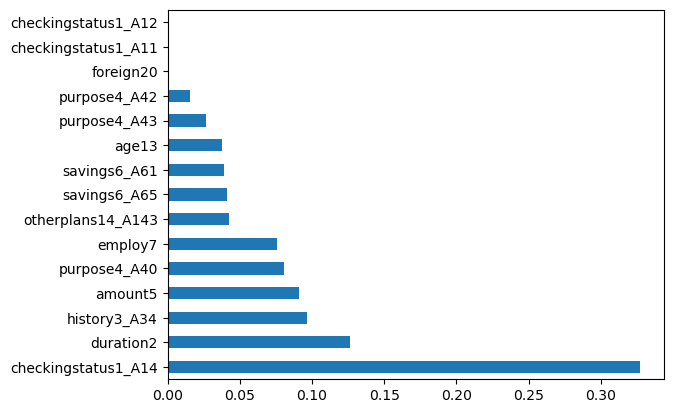

In [88]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
#choose from different tunable hyper parameters
# clf=DecisionTreeClassifier(max_depth=9, criterion='entropy')
clf = DecisionTreeClassifier(max_depth=4,criterion='gini')
# Good Range of Max_depth = 2 to 20

# creating model on training data
DT=clf.fit(X_train, Y_train)

# Generating prediction on testing data
prediction=DT.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))  

# Printing the overall accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(15).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       209
           1       0.71      0.37      0.49        91

    accuracy                           0.76       300
   macro avg       0.74      0.65      0.67       300
weighted avg       0.75      0.76      0.74       300

[[195  14]
 [ 57  34]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.76028751 0.71225296 0.74802495 0.74796273 0.76028751 0.71411643
 0.68221388 0.79897355 0.71433083 0.75665219]

Final Average Accuracy of the model: 0.74


<Axes: >

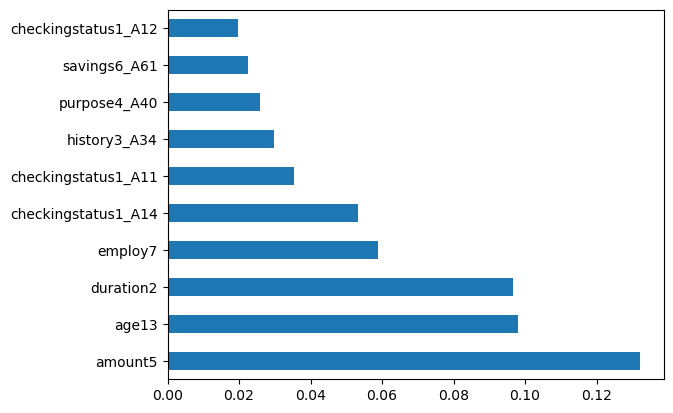

In [89]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
# Good range for max_depth: 2-10 and n_estimators(number of decission tree): 100-1000
clf=RandomForestClassifier(max_depth=13, n_estimators=100, criterion='entropy')
# clf = RandomForestClassifier(max_depth=13, n_estimators=200,criterion='gini')

# Creating model on training data
RF=clf.fit(X_train, Y_train)

# Generating prediction on testing data
prediction=RF.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# AdaBoost

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       209
           1       0.61      0.46      0.53        91

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.73      0.75      0.74       300

[[182  27]
 [ 49  42]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.76118421 0.69605263 0.7343254  0.76987902 0.75256116 0.77781287
 0.67690925 0.76533333 0.77781287 0.77407758]

Final Average Accuracy of the model: 0.75


<Axes: >

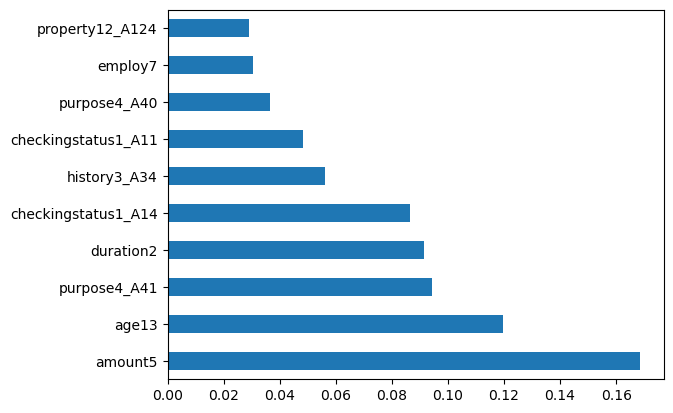

In [90]:
# Adaboost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Choosing Decision Tree with 5 level as the weak learner
# learning_rate between 0.01 to 0.05
# max_depth between 1 to 10
# n_estimators from 100 to 5000
DTC=DecisionTreeClassifier(max_depth=4)
clf=AdaBoostClassifier(n_estimators=200, base_estimator=DTC, learning_rate=0.01)


# Creating the model on Training Data
AB=clf.fit(X_train, Y_train)

# Generating prediction on testing data
prediction=AB.predict(X_test)

# Measuring accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# XGBoost

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       209
           1       0.59      0.42      0.49        91

    accuracy                           0.74       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300

[[183  26]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.49

Accuracy values for 10-fold Cross Validation:
 [0.74802495 0.71388889 0.77775619 0.71776316 0.71019787 0.73104474
 0.79299848 0.77519841 0.71433083 0.75256116]

Final Average Accuracy of the model: 0.74


<Axes: >

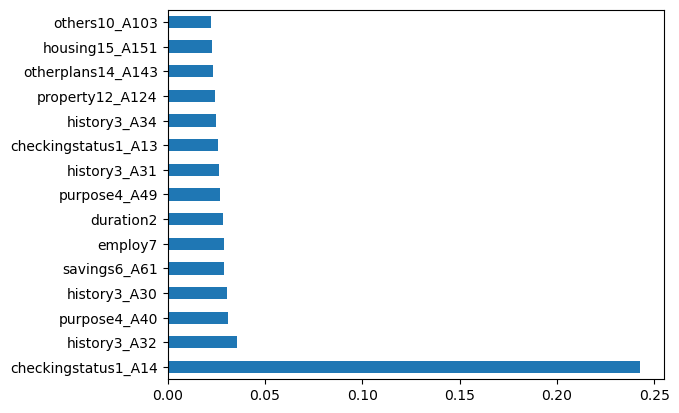

In [91]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01, objective='binary:logistic', booster='gbtree')

# Creating the model on Training Data
XGB=clf.fit(X_train, Y_train)

# Generating prediction on testing data
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction)
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(15).plot(kind='barh')

# KNN

In [92]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

# Creating model on training data
KNN=clf.fit(X_train, Y_train)

# Generating prediction on testing data
prediction=KNN.predict(X_test)

# Measuring accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the overall accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction)
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       209
           1       0.61      0.48      0.54        91

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300

[[181  28]
 [ 47  44]]
Accuracy of the model on Testing Sample Data: 0.54

Accuracy values for 10-fold Cross Validation:
 [0.744      0.6508488  0.66649547 0.74604343 0.70541038 0.78289474
 0.65606469 0.67301587 0.66879756 0.7257269 ]

Final Average Accuracy of the model: 0.7


# SVM

In [93]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)
# here 'C' is for the number of misclassification are allowed
# Kernal can be linear or Polynomial. Kernal finds which degree of equation on predictors is able to bifurcate all the points.
# gamma is the learning rate

# Creating the model on Training Data
SVM=clf.fit(X_train,Y_train)

# Generating prection on testing data
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
# feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
# feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.69775382 0.73089802 0.76533333 0.77229833 0.76118421
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


# Naive Bayes

In [94]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB
clf = GaussianNB()
#clf = MultinomialNB()
# GaussianNB is used in Binomial Classification, i.e., there are only two classes (onlt two unique value) in the target variable
# MultinomialNB is used in multi-class classification, i.e., there are two or more than two classes in the target variable. 
# when there are two classes in the target variable then it's better to use GaussianNB than MultinomialNB, as GaussianNB gives better result

# Creating the model on Training Data
NB=clf.fit(X_train,Y_train)

# Generating prediction on testing data
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       209
           1       0.52      0.70      0.60        91

    accuracy                           0.71       300
   macro avg       0.68      0.71      0.69       300
weighted avg       0.75      0.71      0.72       300

[[150  59]
 [ 27  64]]
Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.7109375  0.51596639 0.7        0.71895121 0.76397059 0.74599729
 0.65466893 0.74430147 0.74599729 0.73833389]

Final Average Accuracy of the model: 0.7


# Deployment of the Model
Based on the above trials, the algorithm that produces the best average accuracy should be selected. In this case, multiple algorithms have produced similar average accuracy. Therefore, any one of them can be chosen. SVM is selected as the final model since it performs very fast on this high-dimensional data.

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end (like Tableau) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'employ', 'age', 'amount', 'duration','checkingstatus', 'history', 'purpose', 'savings', and 'status'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [95]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['duration2', 'amount5', 'age13', 'employ7',
       'checkingstatus1_A11', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history3_A30', 'history3_A31', 'history3_A32',
       'history3_A33', 'history3_A34', 'purpose4_A40', 'purpose4_A41',
       'purpose4_A410', 'purpose4_A42', 'purpose4_A43', 'purpose4_A44',
       'purpose4_A45', 'purpose4_A46', 'purpose4_A48', 'purpose4_A49',
       'savings6_A61', 'savings6_A62', 'savings6_A63', 'savings6_A64',
       'savings6_A65', 'status9_A91', 'status9_A92', 'status9_A93',
       'status9_A94']

X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(Y.shape)

(1000, 32)
(1000,)


## Step 1. Retraining the model using 100% data

In [96]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X,Y)

### Cross validating the final model accuracy with less predictors

In [97]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and Y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.77865613 0.66798419 0.71859838 0.75388863 0.77407758 0.77407758
 0.65866667 0.81369863 0.71776316 0.73549151]

Final Average Accuracy of the model: 0.74


## Step 2. Save the model as a serialized file which can be stored anywhere

In [98]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Lenovo\Desktop\Projects\Credit Risk Prediction


## Step 3. Create a python function

In [99]:
# This Function can be called from any from any front end tool/website
def PredictCreditRisk(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating the Ordinal variable first
    InputData['employ7'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['duration2', 'amount5', 'age13', 'employ7',
       'checkingstatus1_A11', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history3_A30', 'history3_A31', 'history3_A32',
       'history3_A33', 'history3_A34', 'purpose4_A40', 'purpose4_A41',
       'purpose4_A410', 'purpose4_A42', 'purpose4_A43', 'purpose4_A44',
       'purpose4_A45', 'purpose4_A46', 'purpose4_A48', 'purpose4_A49',
       'savings6_A61', 'savings6_A62', 'savings6_A63', 'savings6_A64',
       'savings6_A65', 'status9_A91', 'status9_A92', 'status9_A93',
       'status9_A94']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [100]:
# Calling the function for some loan applications manually
NewCreditDatas=pd.DataFrame(
    data=[[48, 5951, 22,'A73', 'A12', 'A32','A43','A61','A92'],
          [24, 8951,40, 'A72', 'A12','A32','A43','A61','A92']],
    
    columns=['duration2', 'amount5', 'age13', 'employ7', 'checkingstatus1', 'history3', 'purpose4', 'savings6','status9']) 
  
             

print(NewCreditDatas)

# Calling the Function for prediction
PredictCreditRisk(InputData= NewCreditDatas)

   duration2  amount5  age13 employ7 checkingstatus1 history3 purpose4  \
0         48     5951     22     A73             A12      A32      A43   
1         24     8951     40     A72             A12      A32      A43   

  savings6 status9  
0      A61     A92  
1      A61     A92  


,Predicted Status
0,1
1,0


The Function PredictCreditRisk can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every day and generate predictions for all the available cases.